In [3]:
import tensorflow as tf
import numpy as np

In [17]:
#x1 XOR x2 (logistic regression ) (작동 안되는게 정답이었음 ㅋㅋㅋㅋ 아나 ㅋㅋㅋㅋㅋ)
# XOR problem
import tensorflow as tf
import numpy as np

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])
W = tf.Variable(tf.random_normal([2,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#hypothesis = tf.div(1./1.+tf.exp(tf.matmul(X,W)+b))
hypothesis = tf.sigmoid(tf.matmul(X,W)+b)

cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(hypothesis,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nCoeect: ",p,"\naccuracy: ",a)




cost: 0.8134686
cost: 0.69315016
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472

Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Coeect:  [[0.]
 [0.]
 [0.]
 [0.]] 
accuracy:  0.0


In [5]:
#x1 XOR x2 Neural Network (layer 형성하기) z1, z2
import tensorflow as tf
import numpy as np

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])

#layer1이 추가된것 이외에 나머지 소스코드는 동일
#layer의 추가로 학습가능하다는게 진짜 신기하다..
#weight의 크기에 주의. layer1에 의해 y1,y2의  출력이 나옴
W1 = tf.Variable(tf.random_normal([2,2]),name = "weight1")
b1 = tf.Variable(tf.random_normal([2]), name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

#layer1, 즉 y1,y2의 출력으로 xor을 학습시키면 xor도 학습가능
W2 = tf.Variable(tf.random_normal([2,1]), name = "weight2")
b2 = tf.Variable(tf.random_normal([1]),name = "bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1,W2)+b2)


cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nPrediction: ",p,"\naccuracy:  {:.2%}".format(a))
    

cost: 0.71596104
cost: 0.6307419
cost: 0.5129546
cost: 0.27822495
cost: 0.10021421
cost: 0.053885512
cost: 0.035932776
cost: 0.026709894
cost: 0.021161783
cost: 0.017478863
cost: 0.0148646915

Hypothesis:  [[0.01737179]
 [0.98656046]
 [0.9865659 ]
 [0.01476838]] 
Prediction:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  100.00%


In [28]:
#how about wide NN for XOR?

#x1 XOR x2 Neural Network (layer 형성하기) z1, z2

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])

#layer1이 10개의 출력. (wide Neural Network)
#weight의 크기에 주의. layer1에 의해 y1,y2...의  출력이 나옴
W1 = tf.Variable(tf.random_normal([2,10]),name = "weight1")
b1 = tf.Variable(tf.random_normal([10]), name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([10,1]), name = "weight2")
b2 = tf.Variable(tf.random_normal([1]),name = "bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1,W2)+b2)


cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nPrediction: ",p,"\naccuracy:  {:.2%}".format(a))
# -> 작은값은 더 작아지고 큰값은 더 커져서 cost가 줄어들음
# 더 학습이 잘 됨.

cost: 0.7469466
cost: 0.4647674
cost: 0.12804735
cost: 0.05187003
cost: 0.029646857
cost: 0.020029267
cost: 0.014855608
cost: 0.011683223
cost: 0.009562516
cost: 0.008055659
cost: 0.006935424

Hypothesis:  [[0.00518617]
 [0.99275726]
 [0.993079  ]
 [0.00829329]] 
Prediction:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  100.00%


In [29]:
#how about Deep Neural Network for XOR? (넓게 말고 깊게)

#x1 XOR x2 Neural Network (layer 형성하기) z1, z2

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])

#layer1이 10개의 출력. (wide Neural Network)
#weight의 크기에 주의. layer1에 의해 y1,y2...의  출력이 나옴
W1 = tf.Variable(tf.random_normal([2,10]),name = "weight1")
b1 = tf.Variable(tf.random_normal([10]), name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([10,10]),name = "weight2")
b2 = tf.Variable(tf.random_normal([10]), name = "bias2")
layer2 = tf.sigmoid(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([10,10]),name = "weight3")
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")
layer3 = tf.sigmoid(tf.matmul(layer2,W3)+b3)

W4 = tf.Variable(tf.random_normal([10,1]), name = "weight4")
b4 = tf.Variable(tf.random_normal([1]),name = "bias4")
hypothesis = tf.sigmoid(tf.matmul(layer3,W4)+b4)


cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nPrediction: ",p,"\naccuracy:  {:.2%}".format(a))
    
# -> wide만한 학습보다 깊기까지한 학습이 더 효과가 좋음
# 작은값은 더더 작게 큰값은 더더 크게. cost더 줄어들음

cost: 0.69639146
cost: 0.59771377
cost: 0.05275155
cost: 0.012338659
cost: 0.006326462
cost: 0.0041299406
cost: 0.0030242365
cost: 0.0023674509
cost: 0.0019357011
cost: 0.0016318567
cost: 0.0014071119

Hypothesis:  [[9.4928045e-04]
 [9.9880052e-01]
 [9.9839932e-01]
 [1.8747761e-03]] 
Prediction:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  100.00%


In [31]:
#MNIST_data 로 NN 학습시켜보기 (연습)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
tf.set_random_seed(777)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data1/", one_hot=True)

Extracting MNIST_data1/train-images-idx3-ubyte.gz
Extracting MNIST_data1/train-labels-idx1-ubyte.gz
Extracting MNIST_data1/t10k-images-idx3-ubyte.gz
Extracting MNIST_data1/t10k-labels-idx1-ubyte.gz


Epoch: 0001, Cost: 2.333540727
Epoch: 0002, Cost: 2.167449287
Epoch: 0003, Cost: 2.042444268
Epoch: 0004, Cost: 1.901059048
Epoch: 0005, Cost: 1.767631884
Epoch: 0006, Cost: 1.662612824
Epoch: 0007, Cost: 1.580704757
Epoch: 0008, Cost: 1.517545512
Epoch: 0009, Cost: 1.468290300
Epoch: 0010, Cost: 1.430842588
Epoch: 0011, Cost: 1.378834851
Epoch: 0012, Cost: 1.248455399
Epoch: 0013, Cost: 1.167462565
Epoch: 0014, Cost: 1.097851815
Epoch: 0015, Cost: 1.025703421
Epoch: 0016, Cost: 0.975752228
Epoch: 0017, Cost: 0.942743393
Epoch: 0018, Cost: 0.919383645
Epoch: 0019, Cost: 0.900535114
Epoch: 0020, Cost: 0.885172746
Epoch: 0021, Cost: 0.871612126
Epoch: 0022, Cost: 0.860359461
Epoch: 0023, Cost: 0.850082549
Epoch: 0024, Cost: 0.841257236
Epoch: 0025, Cost: 0.833270690
Epoch: 0026, Cost: 0.825616351
Epoch: 0027, Cost: 0.818567260
Epoch: 0028, Cost: 0.811699455
Epoch: 0029, Cost: 0.804747038
Epoch: 0030, Cost: 0.797201076
Epoch: 0031, Cost: 0.788215150
Epoch: 0032, Cost: 0.777491811
Epoch: 0

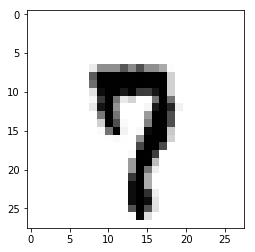

Label:  [8]
Prediction:  [8]


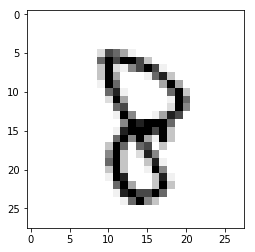

In [42]:
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 

#Using Neural Network
output_num = 50
W1 = tf.Variable(tf.random_normal([784,output_num])) 
b1 = tf.Variable(tf.random_normal([output_num])) 
layer1 = tf.nn.softmax(tf.matmul(X,W1) + b1)

#W2 = tf.Variable(tf.random_normal([output_num, output_num])) 
#b2 = tf.Variable(tf.random_normal([output_num])) 
#layer2 = tf.nn.softmax(tf.matmul(layer1,W2) + b2)
 
# Hypothesis (using softmax) 
W2 = tf.Variable(tf.random_normal([output_num, nb_classes])) 
b2 = tf.Variable(tf.random_normal([nb_classes])) 
hypothesis = tf.nn.softmax(tf.matmul(layer1, W2) + b2) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

 
# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 200
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: {:.2%}".format( 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}) 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 
#deep한 layer를 사용하면 오히려 cost감소가 너무 더뎌지는것이 관측됨.
#one_layer에서 num_epochs를 늘려야 겨우 비슷하게나마 학습되는것이 관측.
#근데 아무리해도 cost값은 내려가도 accuracy값이 만족스럽지 않음... 아마도 다음 수업에서 이유 알려줄듯?
#앗! 그런데 layer 한층에 output_num = 55, num_epochs = 100 으로 학습해서 91.39%의 accuracy 얻음!! 오예!!
#91.39%면 꽤 높은 정확도인듯 나치고는.

In [1]:
# Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name="x")
Y = tf.placeholder(tf.float32, [None, 1], name="y")

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([2]), name="bias_1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", layer1)


with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name="weight_2")
    b2 = tf.Variable(tf.random_normal([1]), name="bias_2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("Cost"):
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    tf.summary.scalar("Cost", cost)

with tf.name_scope("Train"):
    train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, summary, cost_val = sess.run(
            [train, merged_summary, cost], feed_dict={X: x_data, Y: y_data}
        )
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0 0.7168676
100 0.6908567
200 0.49870038
300 0.2253619
400 0.12291672
500 0.07914585
600 0.056153916
700 0.042352118
800 0.033301707
900 0.026986767
1000 0.022373727
1100 0.018883027
1200 0.016166918
1300 0.014005077
1400 0.012251835
1500 0.010807454
1600 0.009601374
1700 0.008582564
1800 0.0077132024
1900 0.006964792
2000 0.0063154213
2100 0.0057480196
2200 0.0052491734
2300 0.0048080757
2400 0.0044160266
2500 0.0040659807
2600 0.003752165
2700 0.0034696562
2800 0.003214465
2900 0.0029831931
3000 0.0027729843
3100 0.0025813607
3200 0.0024062647
3300 0.0022458504
3400 0.0020985582
3500 0.0019630534
3600 0.0018381808
3700 0.0017228327
3800 0.0016161547
3900 0.0015173084
4000 0.0014256047
4100 0.0013404004
4200 0.0012611565
4300 0.0011873196
4400 0.0011184708
4500 0.0010541915
4600 0.0009941373
4700 0.0009379648
4800 0.00088534516
4900 0.00083605415
5000 0.00078983756
5100 0.0007464565
5200 0.00070570176
5300 0.00066743896
5400 0.000631429
5500 0.00059755263
5600 0.00056566036
5700 0.000